In [1]:
!pip install gensim matplotlib scikit-learn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 27.9/27.9 MB 15.9 MB/s eta 0:00:00


In [2]:
import gensim.downloader as api
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

In [3]:
word2vec = api.load("word2vec-google-news-300")

[==================================================] 100.0% 1662.8/1662.8MB downloaded


In [4]:
word2vec.most_similar("king")

[('kings', 0.7138045430183411),
 ('queen', 0.6510956883430481),
 ('monarch', 0.6413194537162781),
 ('crown_prince', 0.6204220056533813),
 ('prince', 0.6159993410110474),
 ('sultan', 0.5864824056625366),
 ('ruler', 0.5797567367553711),
 ('princes', 0.5646552443504333),
 ('Prince_Paras', 0.5432944297790527),
 ('throne', 0.5422105193138123)]

In [5]:
word2vec.most_similar(positive=['king', 'woman'], negative=['man'])

[('queen', 0.7118193507194519),
 ('monarch', 0.6189674139022827),
 ('princess', 0.5902431011199951),
 ('crown_prince', 0.5499460697174072),
 ('prince', 0.5377321839332581),
 ('kings', 0.5236844420433044),
 ('Queen_Consort', 0.5235945582389832),
 ('queens', 0.518113374710083),
 ('sultan', 0.5098593235015869),
 ('monarchy', 0.5087411403656006)]

In [6]:
glove = api.load("glove-wiki-gigaword-100")

[==================================================] 100.0% 128.1/128.1MB downloaded


In [7]:
glove.most_similar("king")

[('prince', 0.7682328820228577),
 ('queen', 0.7507690787315369),
 ('son', 0.7020888328552246),
 ('brother', 0.6985775232315063),
 ('monarch', 0.6977890729904175),
 ('throne', 0.6919989585876465),
 ('kingdom', 0.6811409592628479),
 ('father', 0.6802029013633728),
 ('emperor', 0.6712858080863953),
 ('ii', 0.6676074266433716)]

In [8]:
glove.most_similar(positive=['king', 'woman'], negative=['man'])

[('queen', 0.7698540687561035),
 ('monarch', 0.6843381524085999),
 ('throne', 0.6755736470222473),
 ('daughter', 0.6594556570053101),
 ('princess', 0.6520534157752991),
 ('prince', 0.6517034769058228),
 ('elizabeth', 0.6464517712593079),
 ('mother', 0.631171703338623),
 ('emperor', 0.6106470823287964),
 ('wife', 0.6098655462265015)]

In [9]:
words = [
    "king", "queen", "man", "woman",
    "paris", "france", "rome", "italy",
    "apple", "banana", "orange",
    "dog", "cat", "car", "bus"
]

In [10]:
vectors = []

for word in words:
    if word in word2vec:
        vectors.append(word2vec[word])

vectors = np.array(vectors)

In [11]:
pca = PCA(n_components=2)
result = pca.fit_transform(vectors)

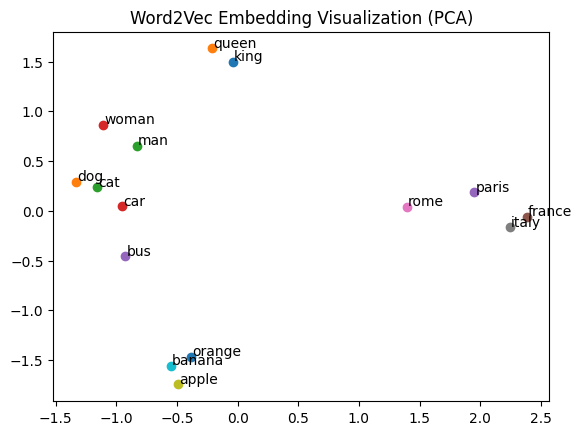

In [12]:
plt.figure()

for i, word in enumerate(words):
    if word in word2vec:
        plt.scatter(result[i, 0], result[i, 1])
        plt.text(result[i, 0]+0.01, result[i, 1]+0.01, word)

plt.title("Word2Vec Embedding Visualization (PCA)")
plt.show()